# Pre-Dojo Financial Behavior

This is just some basic descriptive analysis of the financial behaviour of 31 kids who are signed up to use Dojo. The data were pulled on January 15th, 2018, prior to when the kids actually received and started using Dojo. There are 35 kids in the dataset, which drops to a final set of 29 kids once I remove those who made no transactions.

There are a couple small challenges in here, the main one being that I can only get 50 transactions per kid regardless of whether or not there are more transactions. Despite this, we are still starting with a total of 604 transactions

## Setup

First, just need to import the libraries that I need, bring in the data, and clean it up a little bit to make it useable.

In [64]:
import pandas as pd

# Read the data file in
test_data = pd.read_csv('jan_15_data.csv')

Just taking a quick peak at the number of transactions under each category.

In [65]:

print(test_data['Transaction_DebitCreditCode'].value_counts())
print(test_data['Transaction_AccountAmount'].sum())

D    318
C    285
Name: Transaction_DebitCreditCode, dtype: int64
26072.15


The D stands for Debit, and the C for Credit. So there were 318 instances of kids spending money in the data set, and 285 instances of kids earning money.

Across these transactions, how much money was earned and spent, in total?

In [66]:
amounts_moved = pd.pivot_table(test_data, values='Transaction_AccountAmount',
                               index='Transaction_DebitCreditCode', aggfunc='sum')
print(amounts_moved)

                             Transaction_AccountAmount
Transaction_DebitCreditCode                           
C                                             12764.06
D                                             13308.09


A total of 13,308.09 was spent by the kids, but they only earned 12,764.06. So, on the surface this does not seem so good! Thats an aggregate savings rate of -4.2%.

Let's just take a quick look at the earning and spending by kid to see if anything funky is going on.

In [67]:
amounts_bykid = pd.pivot_table(test_data, values='Transaction_AccountAmount',
                               index=['PID', 'Transaction_DebitCreditCode'], aggfunc='sum')
print(amounts_bykid)

                                 Transaction_AccountAmount
PID Transaction_DebitCreditCode                           
2   C                                                60.00
3   C                                                80.00
4   C                                              1130.78
5   C                                               320.00
    D                                               328.30
6   C                                               977.42
    D                                               814.62
7   C                                              1352.96
    D                                              1394.44
10  C                                               176.27
11  C                                               182.09
    D                                               251.88
12  C                                               117.52
13  C                                               137.28
    D                                               153.

Most of these look relatively normal, but person number 14 looks odd. They spent almost 5,000 dollars. When I dug into their specific transaction history it was clear they were earning bi-weekly pay cheques of nearly 1,600 and were making Master card payments. So, I assume this is not a kid and I dropped them from the dataset.

In [68]:
test_data = test_data[test_data['PID'] != 14]

Let's just confirm they are gone by again looking at the amount of money earned and spent by each kid.

In [69]:
amounts_bykid_new = pd.pivot_table(test_data, values='Transaction_AccountAmount',
                               index=['PID', 'Transaction_DebitCreditCode'], aggfunc='sum')
print(amounts_bykid_new)

                                 Transaction_AccountAmount
PID Transaction_DebitCreditCode                           
2   C                                                60.00
3   C                                                80.00
4   C                                              1130.78
5   C                                               320.00
    D                                               328.30
6   C                                               977.42
    D                                               814.62
7   C                                              1352.96
    D                                              1394.44
10  C                                               176.27
11  C                                               182.09
    D                                               251.88
12  C                                               117.52
13  C                                               137.28
    D                                               153.

Does removing the adult change the overal savings rate?

In [70]:
amounts_moved_new = pd.pivot_table(test_data, values='Transaction_AccountAmount',
                               index='Transaction_DebitCreditCode', aggfunc='sum')
print(amounts_moved_new)

                             Transaction_AccountAmount
Transaction_DebitCreditCode                           
C                                              9406.31
D                                              8446.63


It does change. That adult in the data was skewing it. Now we can see - on the whole - that the kids have an effective savings rate of 10.2%. Not bad! But this is not the best way to actually see the average savings. So I will calculate the savings rate for each kid, then we can just look at the average there.

## Savings Rate

In [71]:
# First, I grouped the data by person id, and then by debit and credits.
# Now, each person has at most two values - the total they spent and the total they earned
# If they only earned, they will only have a value for credits, no debits.
test_data_grouped = test_data.groupby(['PID', 
                                       'Transaction_DebitCreditCode']).agg('sum')

# Now lets get a savings rate for each kid. For now, just going to build two dictionaries by hand and
# do the math across them

earnings_by_kid = {
    '2': 60.00,
    '3': 80.00,
    '4': 1130.78,
    '5': 320.00,
    '6': 977.42,
    '7': 1353.96,
    '10': 176.27,
    '11': 182.09,
    '12': 117.52,
    '13': 137.28,
    '15': 60.01,
    '16': 60.00,
    '17': 410.06,
    '18': 680.20,
    '19': 0.09,
    '20': 615.02,
    '21': 50.52,
    '22': 0.42,
    '23': 1514.57,
    '24': 336.24,
    '25': 260.23,
    '26': 77.03,
    '27': 197.22,
    '28': 0.04,
    '30': 10.00,
    '31': 10.00,
    '32': 30.00,
    '33': 190.07,
    '34': 350.27,
    '35': 20.00,
}

spending_by_kid = {
    '2': 0.00,
    '3': 0.00,
    '4': 0.00,
    '5': 328.30,
    '6': 814.62,
    '7': 1394.44,
    '10': 0.00,
    '11': 251.88,
    '12': 0.00,
    '13': 153.52,
    '15': 0.00,
    '16': 6.83,
    '17': 61.98,
    '18': 2095.31,
    '19': 304.06,
    '20': 615.00,
    '21': 100.00,
    '22': 50.00,
    '23': 1082.31,
    '24': 319.84,
    '25': 130.00,
    '26': 124.00,
    '27': 131.49,
    '28': 0.00,
    '30': 5.00,
    '31': 5.00,
    '32': 0.00,
    '33': 204.43,
    '34': 278.62,
    '35': 0.00,
}

# Making earnings and spending into lists for later
earnings_list = []
for key in earnings_by_kid:
    earnings = earnings_by_kid[key]
    earnings_list.append(earnings)
average_earnings = sum(earnings_list) / len(earnings_list)

spending_list = []
for key in spending_by_kid:
    spending = spending_by_kid[key]
    spending_list.append(spending)
average_spending = sum(spending_list)/len(spending_list)

In [72]:
savings_rate = []

# Now we populate our savings rate list. Just gives us the average savings rate per kid.
for key in earnings_by_kid:
    saving = (((earnings_by_kid[key]) - (spending_by_kid[key])) / (earnings_by_kid[key]))*100
    savings_rate.append(saving)

# Lets just print the average savings rate from our dictionary above
average_savings_rate = sum(savings_rate)/len(savings_rate)
print(average_savings_rate)

-11621.7352012


So, clearly something is goofy here. The average savings rate is -11,621%. When I dug a bit deeper into the earning and spending of each kid I found two outliers. There were two kids who had earnings of less than 0.10, but spending in the hundreds of dollars. So lets remove those kids and recalculate the average savings rate.

In [73]:
savings_rate.remove(-11804.761904761905)
savings_rate.remove(-337744.4444444445)

average_savings_rate = sum(savings_rate)/len(savings_rate)
print(average_savings_rate)

32.0410826677


This is much better, and a lot less horrifying. The average kid is saving 32.04% of what they are earning. Again, not bad! But lets take a look at what this actually looks like.

## Histograms

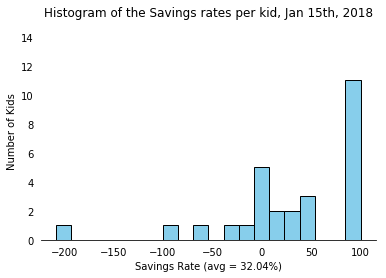

In [74]:
import matplotlib.pyplot as plt
% matplotlib inline

# Savings per kid
fig1, ax1 = plt.subplots()
fig1 = plt.hist(savings_rate, color='skyblue', ec='black', bins=20)
ax1.tick_params(bottom="off", top="off", left="off", right="off")
ax1.set_title('Histogram of the Savings rates per kid, Jan 15th, 2018')
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_ylabel('Number of Kids')
ax1.set_xlabel('Savings Rate (avg = 32.04%)')
ax1.set_ylim(0,15)
plt.show()




This demonstrates, to me, that the average savings rate of 32% is artificially high. I don't think kids are actually saving that much. You can see that right in the middle, 6 kids spent all of what they earned - thats 20% of kids who saved nothing, and another 20% of the kids who are in the red.

The kids who are all up there at 100% savings rates just simply do not have any transactional data yet on their accounts. I suspect this will change once they start using Dojo. I don't think its that they aren't spending any money, I think its that they haven't spent any money yet before getting set up with Dojo. What does the histogram look like, and the average savings rate, if we quickly take a look without these kids with 100% savings?

-14.9983437092


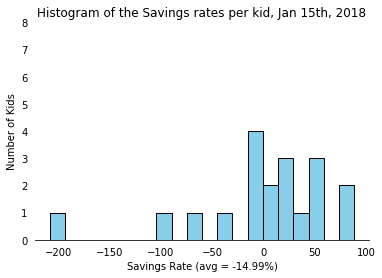

In [76]:
# Make a new savings rate dataset, removing the 100%ers
new_saving = []
for row in savings_rate:
    if row != 100:
        new_saving.append(row)
# Average savings
new_avg = ((sum(new_saving))/(len(new_saving))*100)
print(new_avg)
        
# Plot it
fig2, ax2 = plt.subplots()
fig2 = plt.hist(new_saving, color='skyblue', ec='black', bins=20)
ax2.tick_params(bottom="off", top="off", left="off", right="off")
ax2.set_title('Histogram of the Savings rates per kid, Jan 15th, 2018')
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_ylabel('Number of Kids')
ax2.set_xlabel('Savings Rate (avg = -14.99%)')
ax2.set_ylim(0,8)
plt.show()

This makes a lot more sense. I will add the disclaimer that we obviously don't know right now if my suggestion that those kids aren't actually saving 100% is correct. I only suspect they are kids with brand new accounts. We will know this for certain once we have more data on them from ATB, after using Dojo for a bit.

What we see now, is a much more dismal picture of kids spending and saving. Of the remaining 20 kids, almost 50% of them are in the red, and the average savings rate is now 15%.

Assuming my hunch regarding the 100% savers, this is a much more compelling picture of kids spending habits, and a strong case for why Dojo is a great idea. Change these bad habits before they have a chance to take hold.

### Earning and Spending 

Just a quick visualization of earning and spending, just to see the distributions - are there any weird things right off the bat?

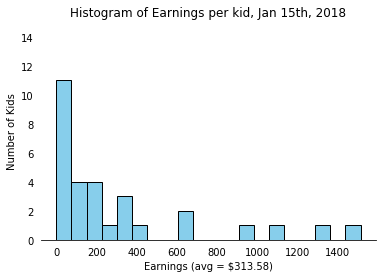

In [80]:
# Earnings per kid
fig3, ax3 = plt.subplots()
fig3 = plt.hist(earnings_list, color='skyblue', ec='black', bins=20)
ax3.tick_params(bottom='off', top='off', left='off', right='off')
ax3.set_title('Histogram of Earnings per kid, Jan 15th, 2018')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.set_ylabel('Number of Kids')
ax3.set_xlabel('Earnings (avg = $313.58)')
ax3.set_ylim(0,15)
plt.savefig("Earning_per_Kid.png", dpi=150)
plt.show()

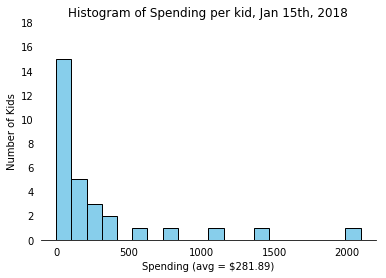

In [80]:
# Spending per kid
fig4, ax4 = plt.subplots()
fig4 = plt.hist(spending_list, color='skyblue', ec='black', bins=20)
ax4.tick_params(bottom='off', top='off', left='off', right='off')
ax4.set_title('Histogram of Spending per kid, Jan 15th, 2018')
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.set_ylabel('Number of Kids')
ax4.set_xlabel('Spending (avg = $281.89)')
ax4.set_ylim(0,18)
plt.savefig("Spending_per_Kid.png", dpi=150)
plt.show()

To me, it is clear again that I think we have outliers skewing our kid data. There seems to be 5 kids in the dataset who earned and spent over 500 dollars. The rest of the kids were below that. I think once we have a more fleshed out dataset we will learn whether or not these kids are truly outliers or if the gaps get filled in. But it seems to me that most kids are earning and spending under 400 dollars across the time range of the data we have. This will become clear when he have more data.

# Challenges

A couple small challenges within these data are with respect to the sample size to begin with. Despite having nearly 600 transactions in the data set to base these numbers off of, this is still only representative of 29 kids. This should be solved once we have the full dataset from ATB.

The biggest challenge is regarding the time frame of the transactional data, and the incomplete records from ATB. Despite some kids have over 50 transactions, I could not pull more than 50, so some of these kids are incomplete and we therefore might not have the most accurate depiction of their spending and saving. Along with these, within these data I did not standardize the time frame. So this might be two months of data from some kids, but two weeks for others. In further analyses, once the data are more complete and we have access to complete records, I will standardize all time frames. For example, we can analyze spending and saving for three months leading up to the kids beginning with Dojo, then the following three months to see how their behavior changes over time around that focal point.